In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import scanpy as sc
import umap
import anndata
import tables
from tqdm import tqdm
import scipy.sparse as sp
import seaborn as sns
from matplotlib import cm, colors
from matplotlib.pyplot import rc_context
import sklearn

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
!ls ../data

e18_mouse_brain_fresh_5k_filtered_feature_bc_matrix.h5


In [13]:
adata1 = sc.read_10x_h5(
    '../data/e18_mouse_brain_fresh_5k_filtered_feature_bc_matrix.h5'
)

# adata1 = adata1.var_names_make_unique()
adata1.var["gene_ids"]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<4878x32285 sparse matrix of type '<class 'numpy.float32'>'
	with 15585193 stored elements in Compressed Sparse Row format>

In [29]:
# sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.set_figure_params(dpi=200, dpi_save=300, color_map = 'viridis_r', vector_friendly=True, format = "tiff")
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.8.0 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.10 louvain==0.7.1 pynndescent==0.5.5


In [30]:
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata1, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(adata1)


# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
adata1.raw = adata1
adata1

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4878 × 32285
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

Highly variable genes: 4434


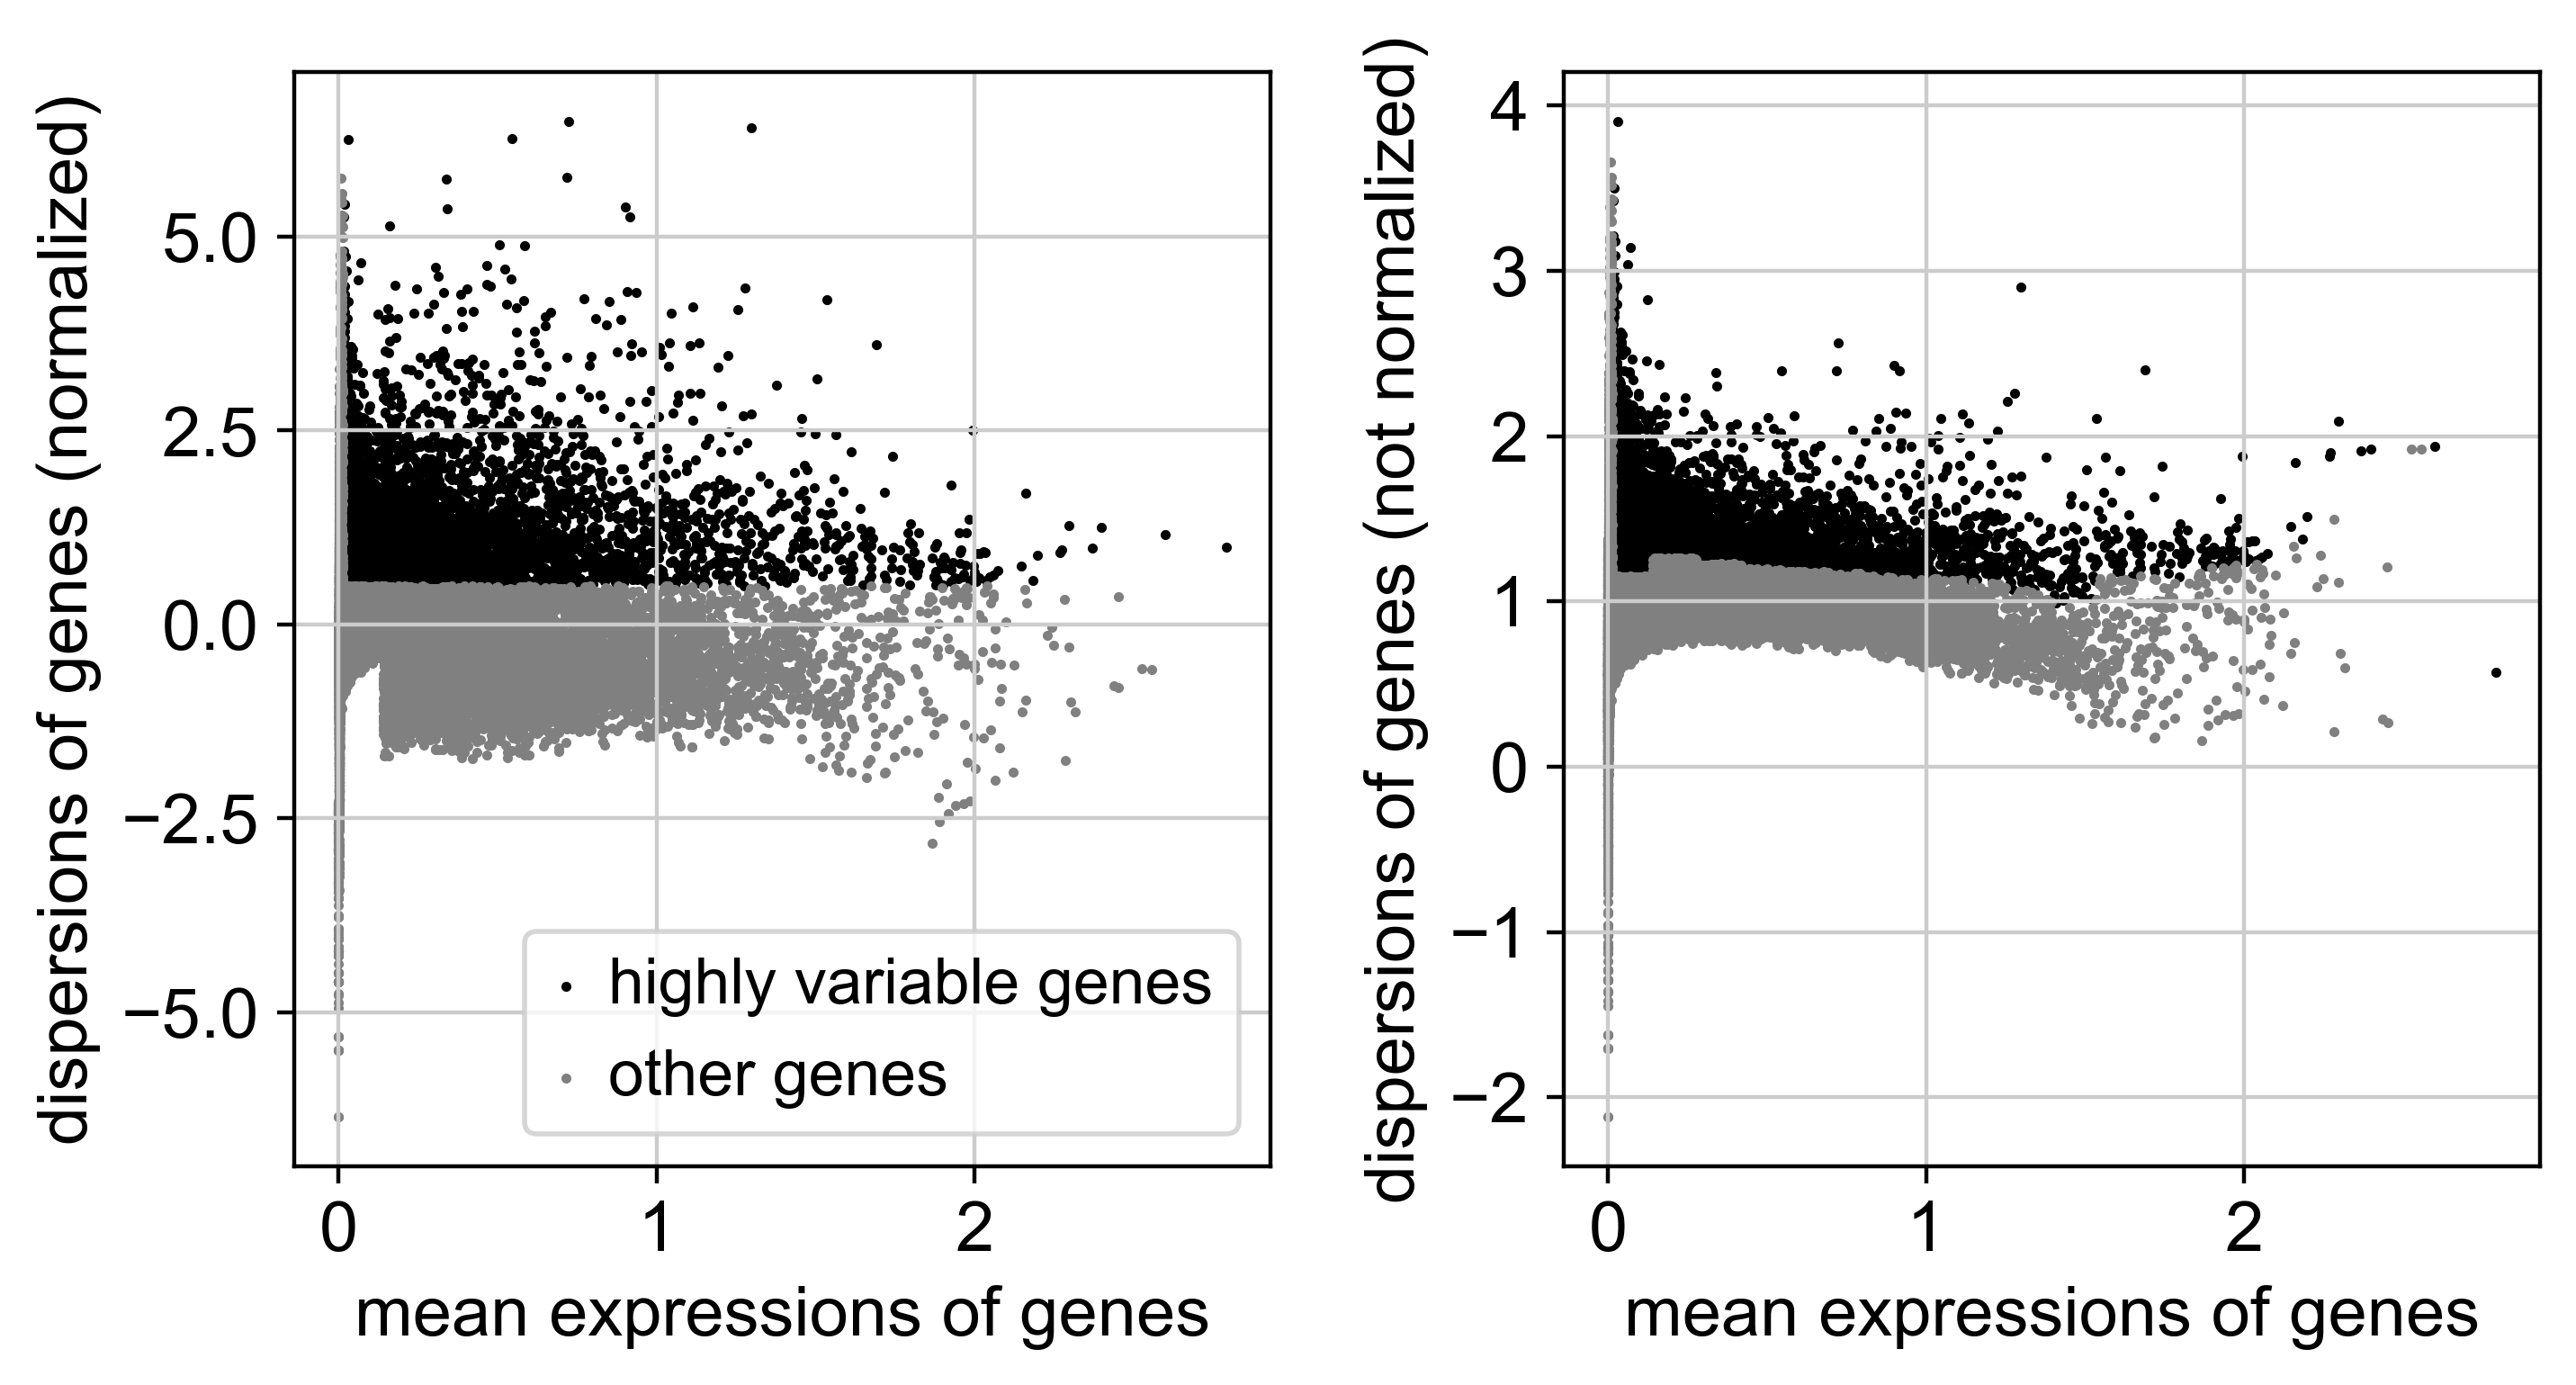

In [31]:
# compute variable genes
sc.pp.highly_variable_genes(adata1, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata1.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata1)

# subset for variable genes in the dataset
adata1_highly_variable = adata1[:, adata1.var['highly_variable']]

In [32]:
adata1_highly_variable

View of AnnData object with n_obs × n_vars = 4878 × 4434
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/renhaoluo/anaconda3/envs/snRNA_analysis/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/Users/renhaoluo/anaconda3/envs/snRNA_analysis/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genome' as categorical


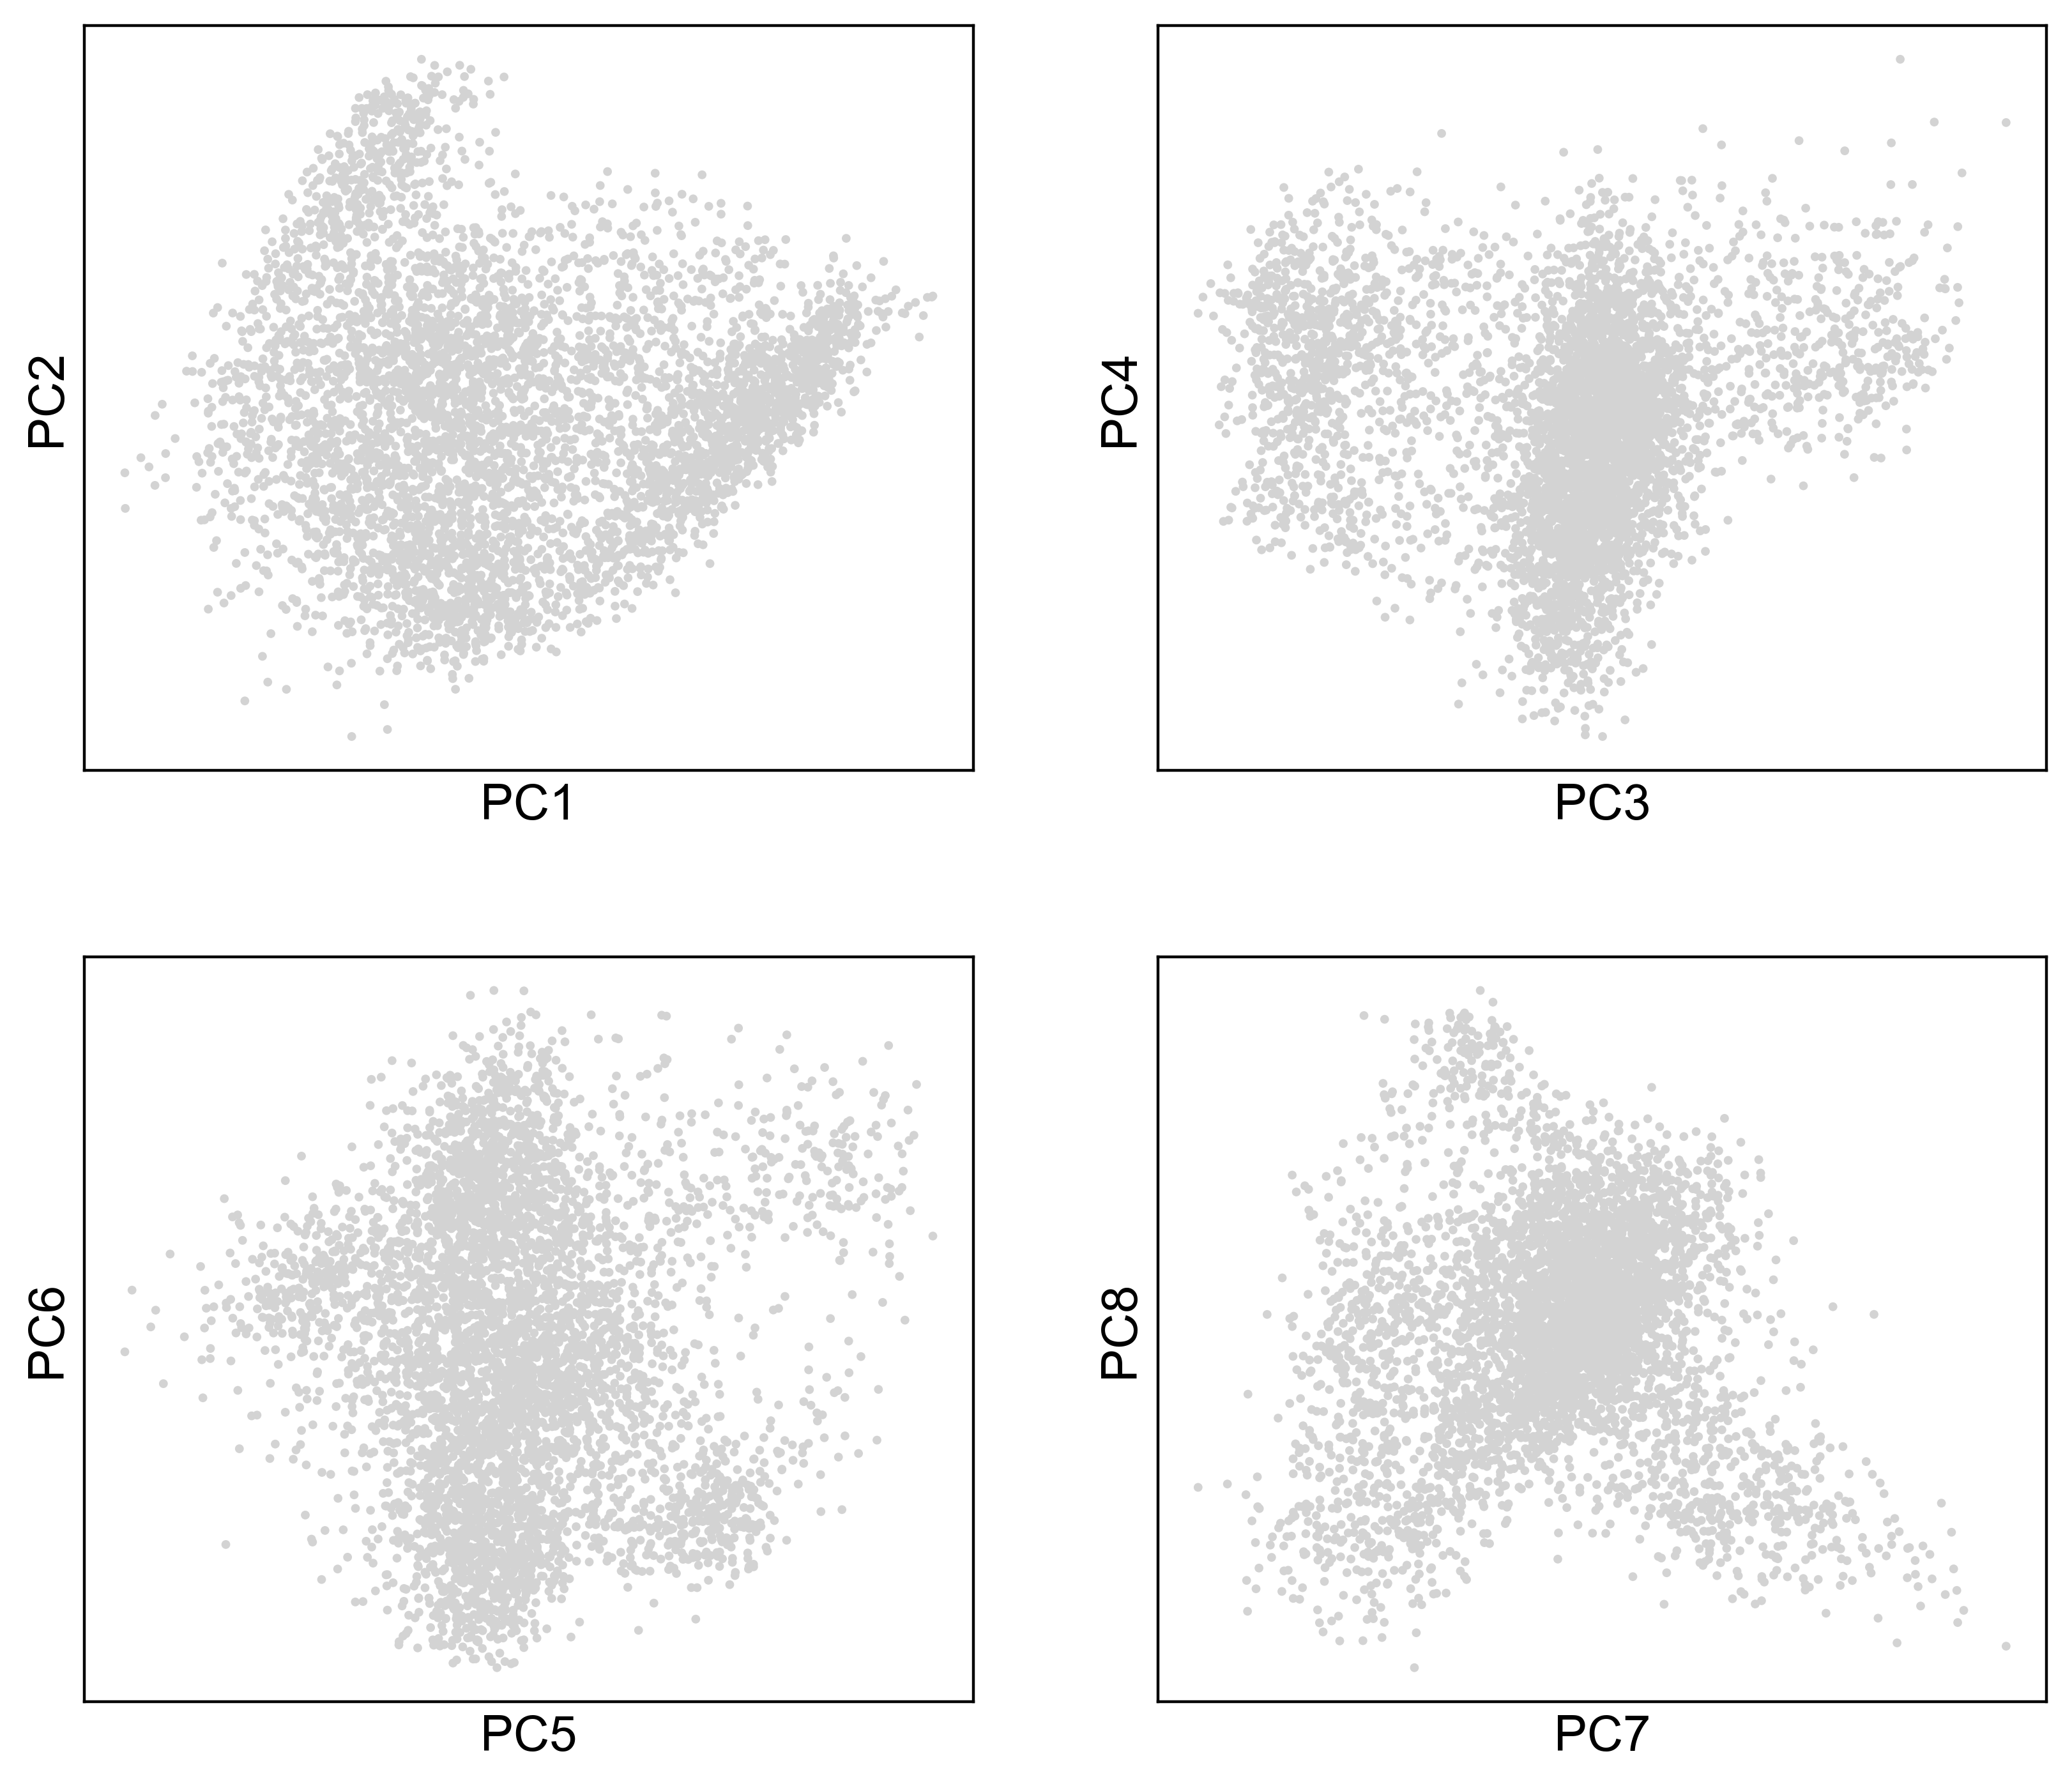

In [33]:
sc.tl.pca(adata1_highly_variable, svd_solver='arpack')
sc.pl.pca(adata1_highly_variable, components = ['1,2','3,4','5,6','7,8'], ncols=2)

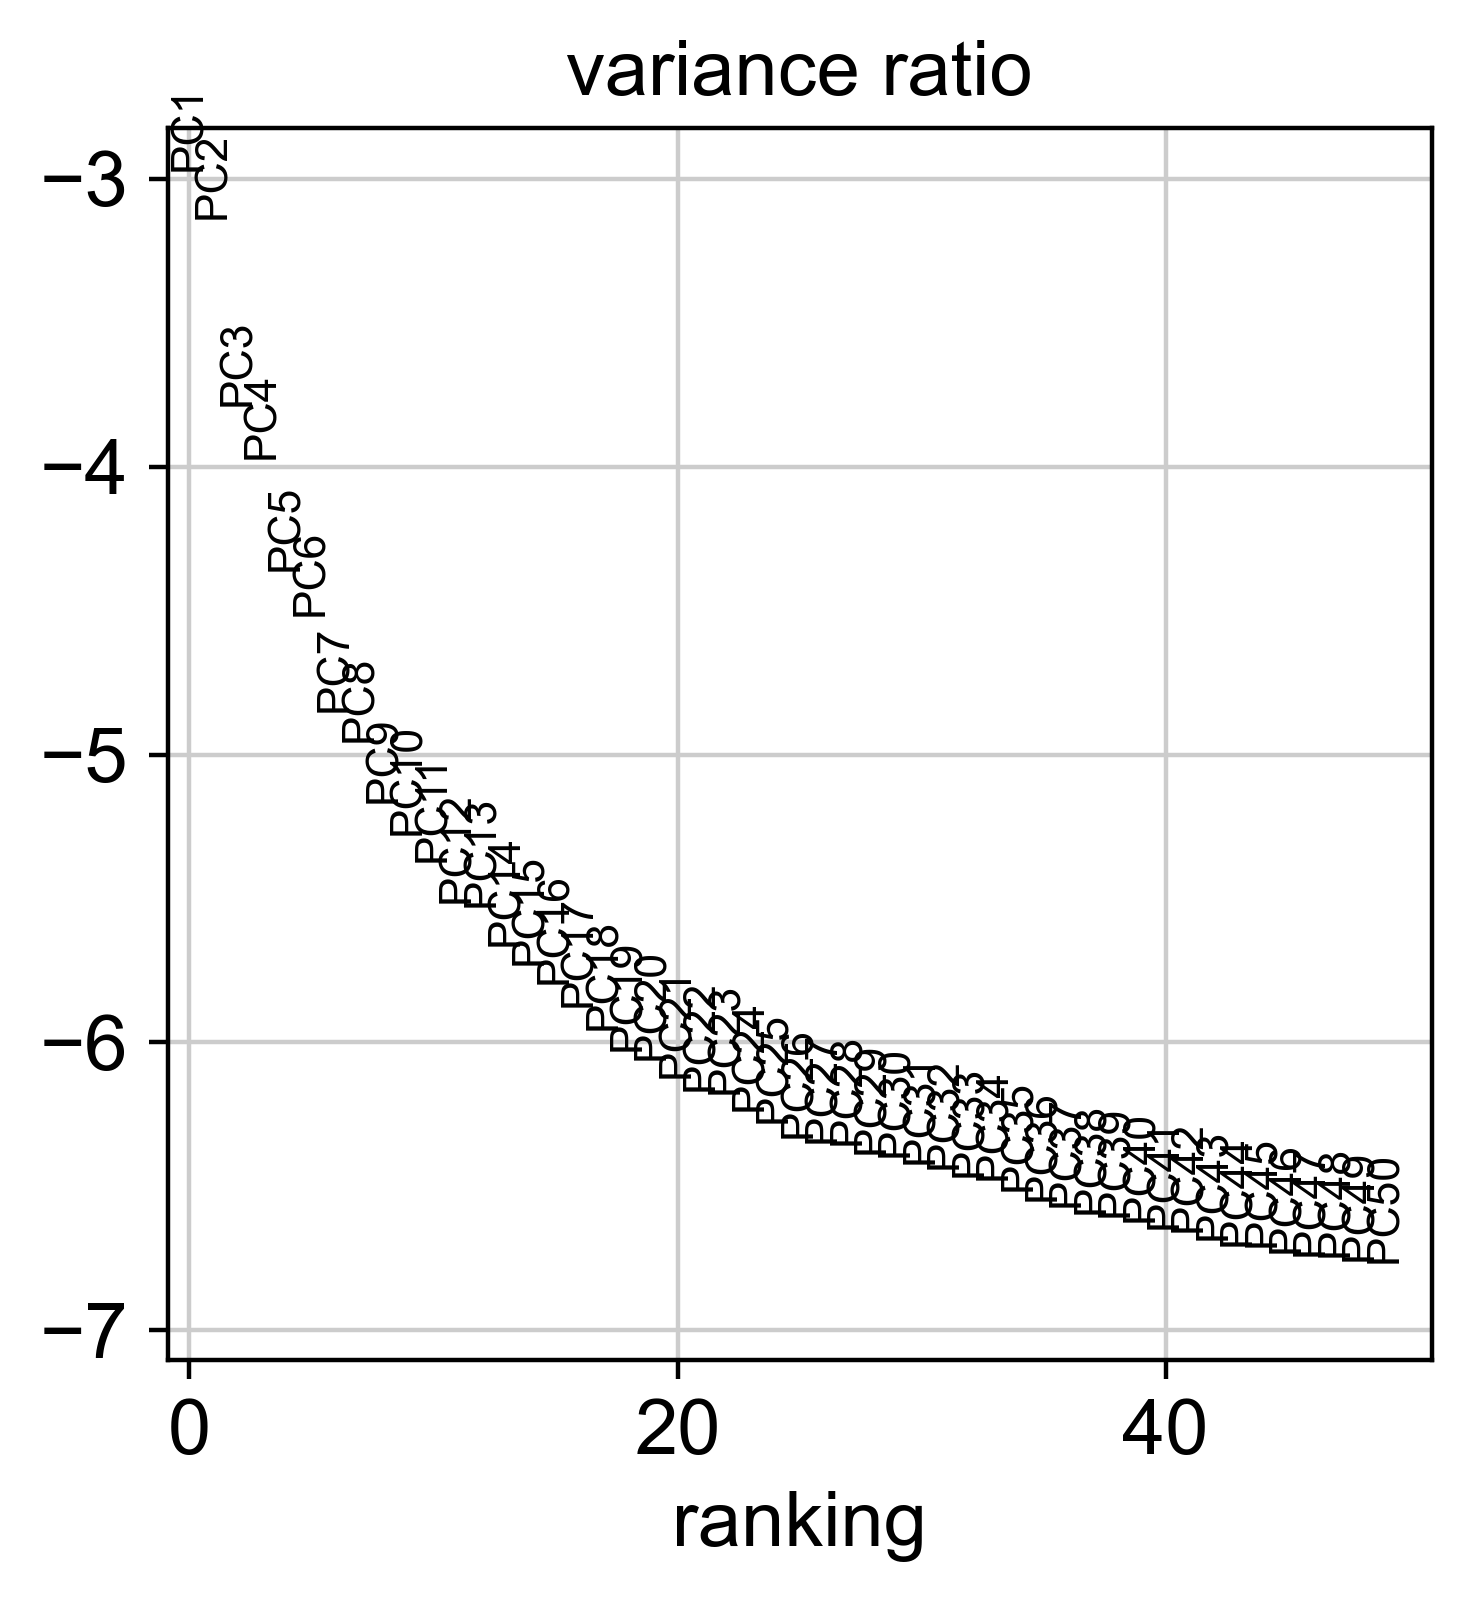

In [34]:
sc.pl.pca_variance_ratio(adata1_highly_variable, log=True, n_pcs = 50)

/Users/renhaoluo/anaconda3/envs/snRNA_analysis/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


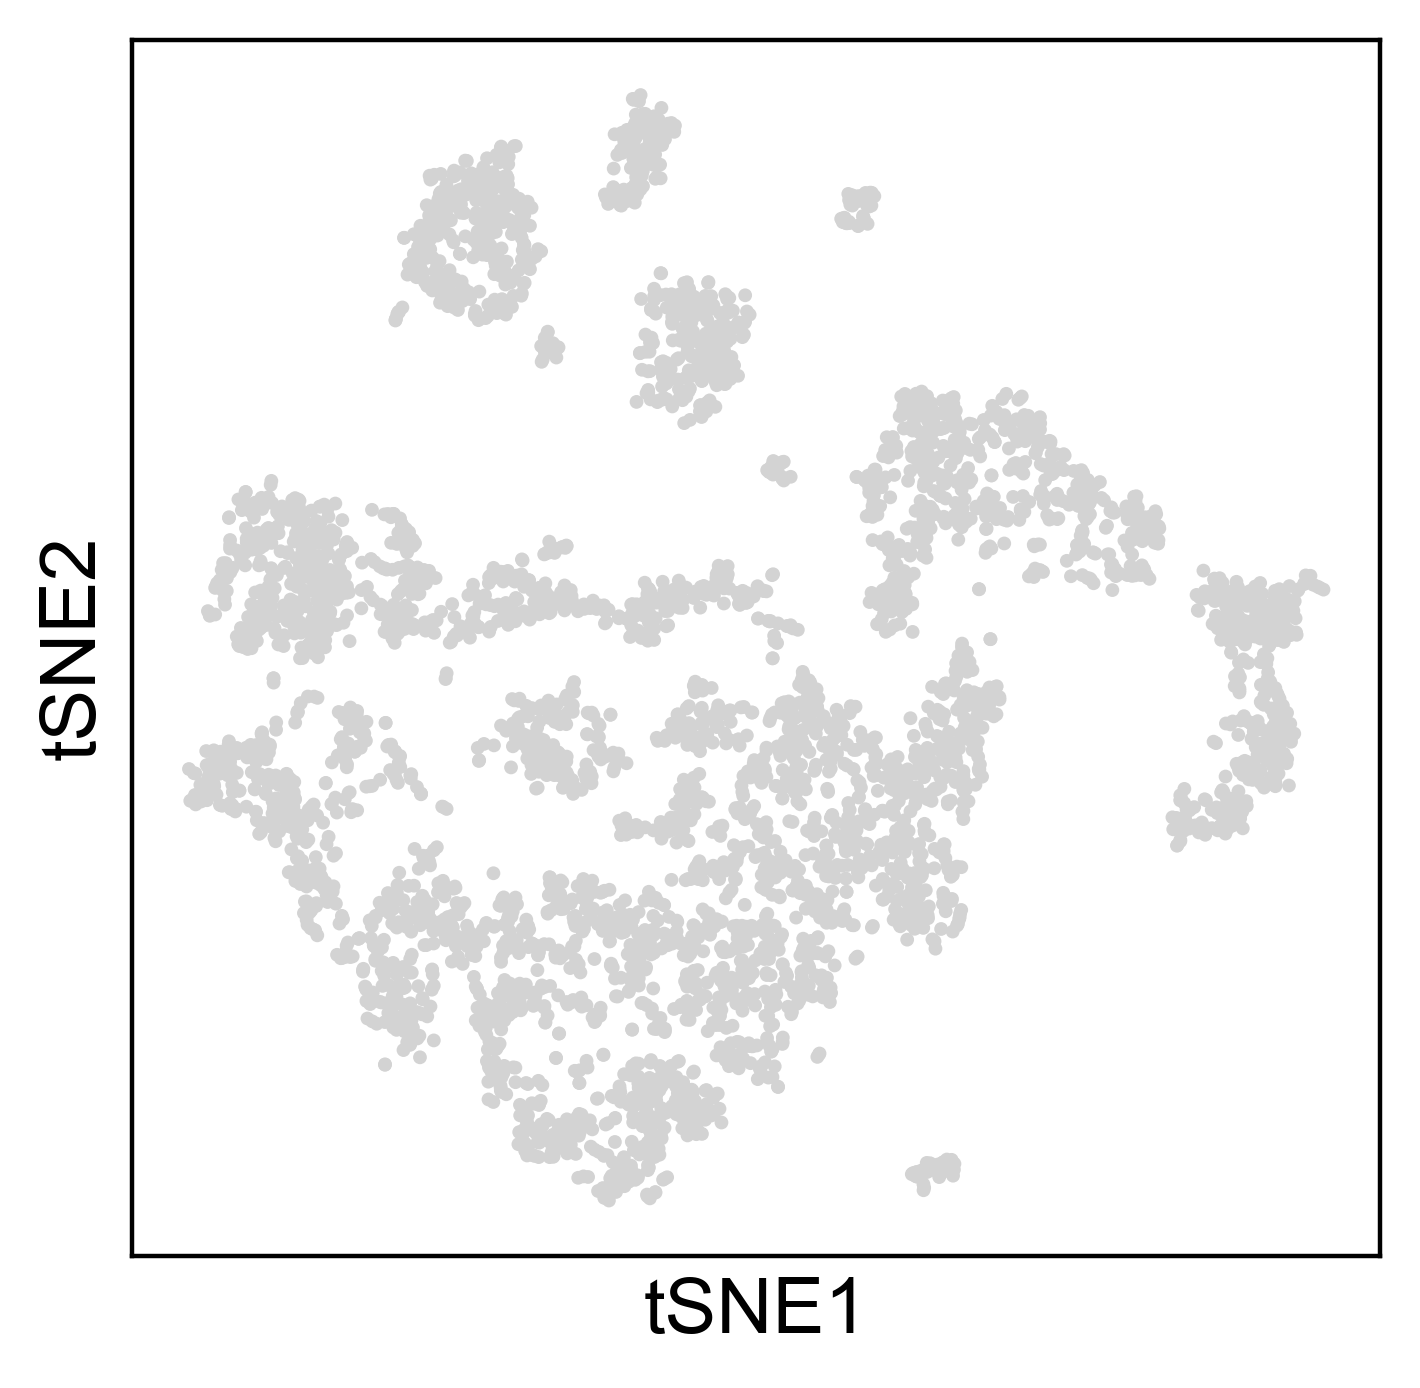

In [35]:
sc.tl.tsne(adata1_highly_variable, n_pcs = 30)
sc.pl.tsne(adata1_highly_variable)

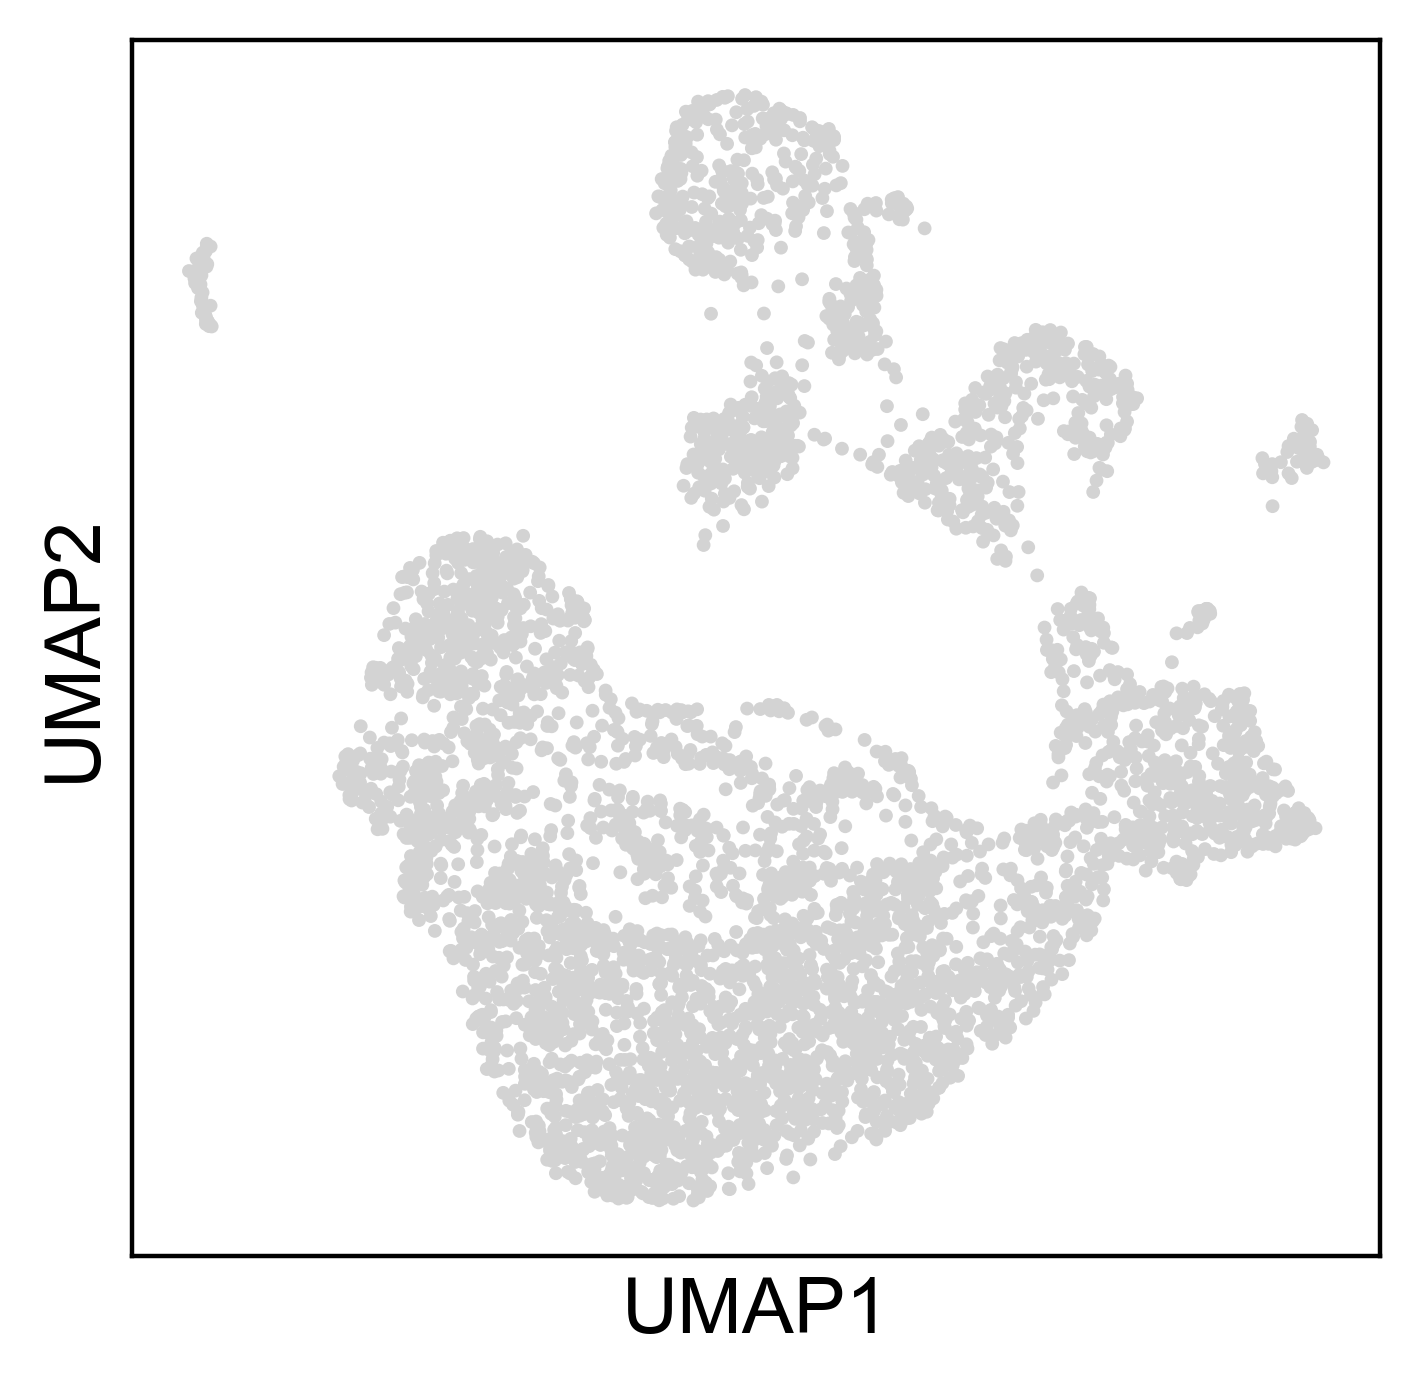

In [36]:
sc.pp.neighbors(adata1_highly_variable, n_pcs = 30, n_neighbors = 20)
sc.tl.umap(adata1_highly_variable)
sc.pl.umap(adata1_highly_variable)

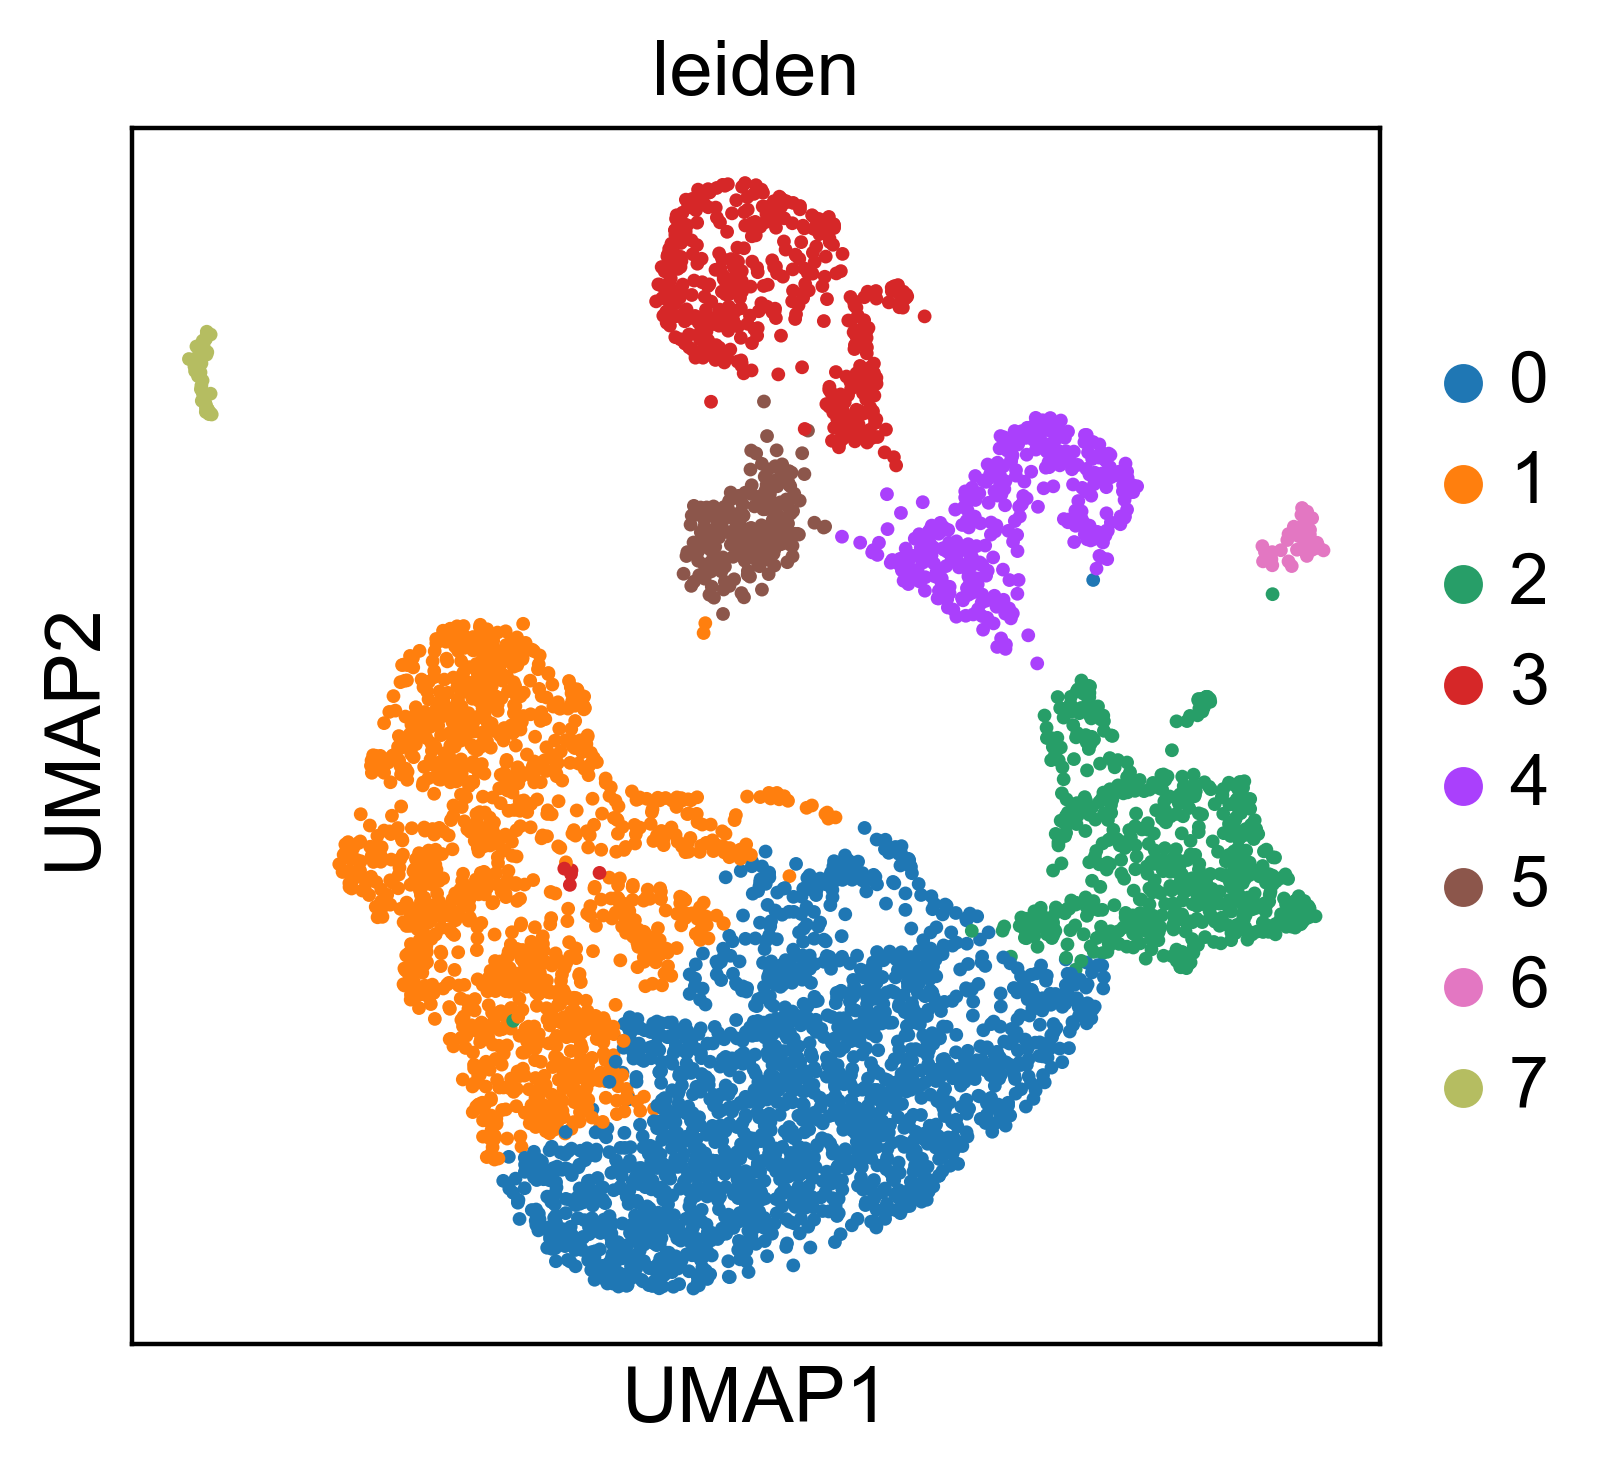

In [37]:
sc.tl.leiden(adata1_highly_variable, resolution=0.15) 
sc.pl.umap(adata1_highly_variable, color=['leiden'])

In [38]:
# adata1_highly_variable.write_h5ad("../data/e18_mouse_brain_fresh_5k_filtered_feature_bc_matrix_initial_explore.h5ad")

/Users/renhaoluo/anaconda3/envs/snRNA_analysis/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/Users/renhaoluo/anaconda3/envs/snRNA_analysis/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genome' as categorical
